# Load Libraries/Data

In [1]:
## Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
## Importing the OS and JSON Modules
import os,json

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_info = pd.read_csv('Data/superhero_info.csv')
df_info.head(2)

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"


In [3]:
df_powers = pd.read_csv('Data/superhero_powers.csv')
df_powers.head(2)

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."


# Part 1: Clean Files and Combine Into One DataFrame

This dataframe should have the following columns:
- Hero (Just the name of the Hero)
- Publisher
- Gender
- Eye color
- Race
- Hair color
- Height (numeric)
- Skin color
- Alignment
- Weight (numeric)
- Plus, one-hot-encoded columns for every power that appears in the dataset. E.g.:
    - Agility
    - Flight
    - Superspeed
    - etc.
- Hint: There is a space in "100 kg" or "52.5 cm"

## Superhero_Info DataFrame

### Split 'Hero|Publisher' Column

In [4]:
df_info[['Hero', 'Publisher']] = df_info['Hero|Publisher'].str.split('|', expand=True)
df_info

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics
...,...,...,...,...,...,...,...,...,...,...
458,Yellowjacket|Marvel Comics,Male,Human,good,Blond,blue,Unknown,"{'Height': '183.0 cm', 'Weight': '83.0 kg'}",Yellowjacket,Marvel Comics
459,Yellowjacket II|Marvel Comics,Female,Human,good,Strawberry Blond,blue,Unknown,"{'Height': '165.0 cm', 'Weight': '52.0 kg'}",Yellowjacket II,Marvel Comics
460,Yoda|George Lucas,Male,Yoda's species,good,White,brown,green,"{'Height': '66.0 cm', 'Weight': '17.0 kg'}",Yoda,George Lucas
461,Zatanna|DC Comics,Female,Human,good,Black,blue,Unknown,"{'Height': '170.0 cm', 'Weight': '57.0 kg'}",Zatanna,DC Comics


In [5]:
# drop original column
df_info.drop(columns='Hero|Publisher', inplace=True)
df_info.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics


### Set 'Hero' and 'Publisher' as First and Second Column

In [6]:
print(list(df_info.columns))

['Gender', 'Race', 'Alignment', 'Hair color', 'Eye color', 'Skin color', 'Measurements', 'Hero', 'Publisher']


In [7]:
df_info = df_info[['Hero', 'Publisher', 'Gender', 'Race', 'Alignment', 'Hair color', 'Eye color', 'Skin color', 'Measurements']]
df_info.head(2)

,Hero,Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb,Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien,Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"


### Split 'Measurements' Column

In [8]:
type(df_info['Measurements'][0])

str

In [9]:
df_info['Measurements'] = df_info['Measurements'].str.replace("'", '"')
df_info['Measurements']

0      {"Height": "203.0 cm", "Weight": "441.0 kg"}
1       {"Height": "191.0 cm", "Weight": "65.0 kg"}
2       {"Height": "185.0 cm", "Weight": "90.0 kg"}
3      {"Height": "203.0 cm", "Weight": "441.0 kg"}
4      {"Height": "193.0 cm", "Weight": "122.0 kg"}
                           ...                     
458     {"Height": "183.0 cm", "Weight": "83.0 kg"}
459     {"Height": "165.0 cm", "Weight": "52.0 kg"}
460      {"Height": "66.0 cm", "Weight": "17.0 kg"}
461     {"Height": "170.0 cm", "Weight": "57.0 kg"}
462     {"Height": "185.0 cm", "Weight": "81.0 kg"}
Name: Measurements, Length: 463, dtype: object

In [10]:
df_info['Measurements'] = df_info['Measurements'].apply(json.loads)
df_info['Measurements'].head(2)

0    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
1     {'Height': '191.0 cm', 'Weight': '65.0 kg'}
Name: Measurements, dtype: object

In [11]:
type(df_info['Measurements'][0])

dict

In [12]:
height_weight = df_info['Measurements'].apply(pd.Series)
height_weight

,Height,Weight
0,203.0 cm,441.0 kg
1,191.0 cm,65.0 kg
2,185.0 cm,90.0 kg
3,203.0 cm,441.0 kg
4,193.0 cm,122.0 kg
...,...,...
458,183.0 cm,83.0 kg
459,165.0 cm,52.0 kg
460,66.0 cm,17.0 kg
461,170.0 cm,57.0 kg


In [13]:
df_info = pd.concat((df_info, height_weight), axis=1)
df_info.head(2)

,Hero,Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Height,Weight
0,A-Bomb,Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",203.0 cm,441.0 kg
1,Abe Sapien,Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",191.0 cm,65.0 kg


In [14]:
df_info.drop(columns='Measurements', inplace=True)
df_info.head(2)

,Hero,Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Height,Weight
0,A-Bomb,Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,203.0 cm,441.0 kg
1,Abe Sapien,Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,191.0 cm,65.0 kg


### Convert 'Height' and 'Weight' to Numeric Type

In [15]:
df_info.rename(columns={'Height': 'Height (cm)', 'Weight': 'Weight (kg)'},
              inplace=True)
df_info.head(2)

,Hero,Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Height (cm),Weight (kg)
0,A-Bomb,Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,203.0 cm,441.0 kg
1,Abe Sapien,Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,191.0 cm,65.0 kg


#### Height

In [16]:
type(df_info['Height (cm)'][0])

str

In [17]:
# remove empty space and 'cm' from 'Height (cm)'

to_replace = [' ', 'cm']

for char in to_replace:
    df_info['Height (cm)'] = df_info['Height (cm)'].str.replace(char, '', regex=False)
df_info.head(2)

,Hero,Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Height (cm),Weight (kg)
0,A-Bomb,Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,203.0,441.0 kg
1,Abe Sapien,Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,191.0,65.0 kg


In [18]:
type(df_info['Height (cm)'][0])

str

In [19]:
df_info['Height (cm)'] = df_info['Height (cm)'].astype('float')
type(df_info['Height (cm)'][0])

numpy.float64

#### Weight

In [20]:
type(df_info['Weight (kg)'][0])

str

In [21]:
# remove empty space and 'cm' from 'Height (cm)'

to_replace = [' ', 'kg']

for char in to_replace:
    df_info['Weight (kg)'] = df_info['Weight (kg)'].str.replace(char, '', regex=False)
df_info.head(2)

,Hero,Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Height (cm),Weight (kg)
0,A-Bomb,Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,203.0,441.0
1,Abe Sapien,Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,191.0,65.0


In [22]:
df_info['Weight (kg)'] = df_info['Weight (kg)'].astype('float')
type(df_info['Weight (kg)'][0])

numpy.float64

## Superhero_Powers DataFrame

In [23]:
df_powers.head(2)

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."


In [24]:
print(type(df_powers['Powers'][0]))
df_powers['Powers'][0]

<class 'str'>


'Agility,Super Strength,Stamina,Super Speed'

### Convert 'Powers' to List

In [25]:
df_powers['Powers_Split'] = df_powers['Powers'].str.split(',')

In [26]:
df_powers.head(2)

,hero_names,Powers,Powers_Split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S..."


In [27]:
print(type(df_powers['Powers_Split'][0]))
df_powers['Powers_Split']

<class 'list'>


0        [Agility, Super Strength, Stamina, Super Speed]
1      [Accelerated Healing, Durability, Longevity, S...
2      [Agility, Accelerated Healing, Cold Resistance...
3                                   [Lantern Power Ring]
4      [Accelerated Healing, Intelligence, Super Stre...
                             ...                        
662               [Flight, Energy Blasts, Size Changing]
663    [Cold Resistance, Durability, Longevity, Super...
664    [Agility, Stealth, Danger Sense, Marksmanship,...
665    [Cryokinesis, Telepathy, Magic, Fire Control, ...
666    [Super Speed, Intangibility, Time Travel, Time...
Name: Powers_Split, Length: 667, dtype: object

### One-Hot-Encode 'Powers'

In [28]:
df_powers['Powers_Split'].value_counts()

[Intelligence]                                                                                                                                                                                                                                                                          8
[Durability, Super Strength]                                                                                                                                                                                                                                                            5
[Agility, Stealth, Marksmanship, Weapons Master, Stamina]                                                                                                                                                                                                                               4
[Marksmanship]                                                                                                                                            

In [29]:
## exploding the column of lists
exploded = df_powers.explode('Powers_Split')
exploded.head(5)

,hero_names,Powers,Powers_Split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Agility
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Strength
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Stamina
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Speed
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Accelerated Healing


In [30]:
## dropping null values first
## saving the unique values from the exploded column
cols_to_make = exploded['Powers_Split'].dropna().unique()
cols_to_make

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [31]:
# making new column for each unique power from 'Power_Split' column
# checking with original 'Powers' column for True or False

for col in cols_to_make:
    df_powers[col] = df_powers['Powers'].str.contains(col)
df_powers.head()

,hero_names,Powers,Powers_Split,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance...",True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre...",False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
df_powers.drop(columns=['Powers', 'Powers_Split'], inplace=True)
df_powers.head(2)

,hero_names,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,Self-Sustenance,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,True,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


## Combine Into One Dataframe

In [33]:
df_final = pd.merge(df_info, df_powers, left_on='Hero', right_on='hero_names')
df_final.head(2)

,Hero,Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Height (cm),Weight (kg),...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,A-Bomb,Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,191.0,65.0,...,False,False,False,False,False,False,False,False,False,False


#### Drop 'hero_names' Since It's a Duplicate of 'Hero'

In [34]:
df_final.drop(columns='hero_names', inplace=True)
df_final.head(2)

,Hero,Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Height (cm),Weight (kg),...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,A-Bomb,Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,191.0,65.0,...,False,False,False,False,False,False,False,False,False,False


- Column count is now 177

# Part 2: Answer Questions

## 1. Compare the average weight of super powers (heroes?) who have Super Speed to those who do not.

In [35]:
np.where(cols_to_make == 'Super Speed')

(array([3], dtype=int64),)

In [36]:
heroes_speed = df_final['Super Speed'] == True
df_speed = df_final[heroes_speed]
df_speed

,Hero,Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Height (cm),Weight (kg),...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
3,Abomination,Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
5,Adam Strange,DC Comics,Male,Human,good,Blond,blue,Unknown,185.0,88.0,...,False,False,False,False,False,False,False,False,False,False
8,Air-Walker,Marvel Comics,Male,Unknown,bad,White,blue,Unknown,188.0,108.0,...,False,False,False,False,False,False,False,False,False,False
9,Ajax,Marvel Comics,Male,Cyborg,bad,Black,brown,Unknown,193.0,90.0,...,False,False,False,False,False,False,False,False,False,False
10,Alan Scott,DC Comics,Male,Unknown,good,Blond,blue,Unknown,180.0,90.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,Wonder Girl,DC Comics,Female,Demi-God,good,Blond,blue,Unknown,165.0,51.0,...,False,False,False,False,False,False,False,False,False,False
454,Wonder Man,Marvel Comics,Male,Unknown,good,Black,red,Unknown,188.0,171.0,...,False,False,False,False,False,False,False,False,False,False
455,Wonder Woman,DC Comics,Female,Amazon,good,Black,blue,Unknown,183.0,74.0,...,False,False,False,False,False,False,False,False,False,False
460,Yoda,George Lucas,Male,Yoda's species,good,White,brown,green,66.0,17.0,...,False,False,False,False,False,False,False,False,False,False


In [37]:
df_not_speed = df_final[~heroes_speed]
df_not_speed

,Hero,Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Height (cm),Weight (kg),...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,A-Bomb,Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,191.0,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,DC Comics,Male,Ungaran,good,No Hair,blue,red,185.0,90.0,...,False,False,False,False,False,False,False,False,False,False
4,Absorbing Man,Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,193.0,122.0,...,False,False,False,False,False,False,False,False,False,False
6,Agent Bob,Marvel Comics,Male,Human,good,Brown,brown,Unknown,178.0,81.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,X-23,Marvel Comics,Female,Mutant / Clone,good,Black,green,Unknown,155.0,50.0,...,False,False,False,False,False,False,False,False,False,False
457,X-Man,Marvel Comics,Male,Unknown,good,Brown,blue,Unknown,175.0,61.0,...,False,False,False,False,False,False,False,False,False,False
458,Yellowjacket,Marvel Comics,Male,Human,good,Blond,blue,Unknown,183.0,83.0,...,False,False,False,False,False,False,False,False,False,False
459,Yellowjacket II,Marvel Comics,Female,Human,good,Strawberry Blond,blue,Unknown,165.0,52.0,...,False,False,False,False,False,False,False,False,False,False


In [38]:
avg_speed_weight = df_speed['Weight (kg)'].mean().round(2)
avg_not_speed_weight = df_not_speed['Weight (kg)'].mean().round(2)
print(avg_speed_weight)
print(avg_not_speed_weight)

129.4
101.77


In [39]:
print(f'The average weight (kg) for Super Heroes that have "Super Speed" is \
{avg_speed_weight} compared to the average weight of Super Heroes that don\'t \
{avg_not_speed_weight}')
print(f'On average, "Super Speed" Super Heroes weigh \
{(avg_speed_weight-avg_not_speed_weight).round(2)} kg \
more.')

The average weight (kg) for Super Heroes that have "Super Speed" is 129.4 compared to the average weight of Super Heroes that don't 101.77
On average, "Super Speed" Super Heroes weigh 27.63 kg more.


In [40]:
speed_dict = {'Have Super Speed': avg_speed_weight,
             'Do Not Have Super Speed': avg_not_speed_weight}

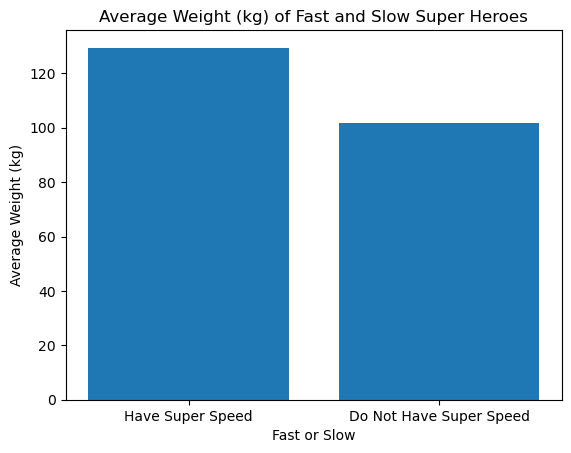

In [41]:
plt.bar(speed_dict.keys(), speed_dict.values())
plt.xlabel('Fast or Slow')
plt.ylabel('Average Weight (kg)')
plt.title('Average Weight (kg) of Fast and Slow Super Heroes');

## 2. What is the average height of heroes for each publisher?

In [42]:
publisher_height = df_final.groupby('Publisher')['Height (cm)'].mean().sort_values(ascending=False)
publisher_height

Publisher
Image Comics         211.000000
Marvel Comics        191.546128
DC Comics            181.923913
Star Trek            181.500000
Team Epic TV         180.750000
Unknown              178.000000
Dark Horse Comics    176.909091
Shueisha             171.500000
George Lucas         159.600000
Name: Height (cm), dtype: float64

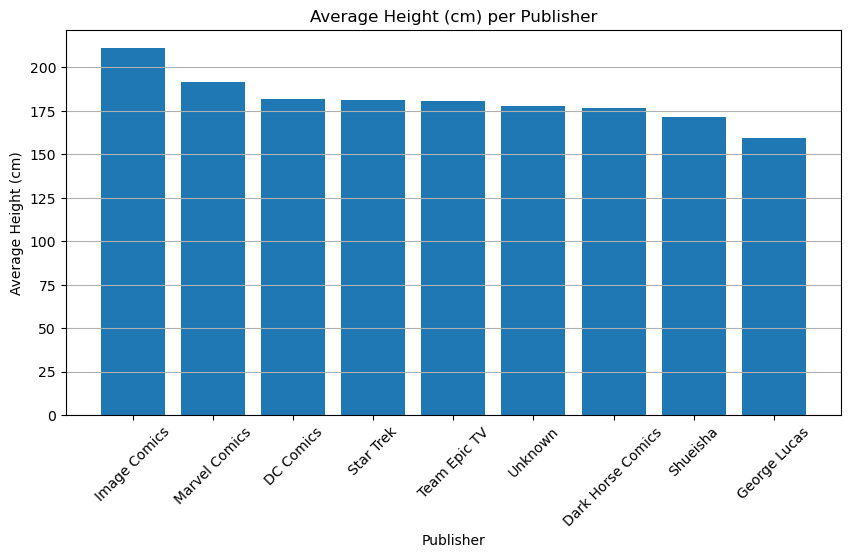

In [43]:
fig, ax = plt.subplots(figsize=(10, 5))

ax = plt.bar(publisher_height.index, publisher_height.values)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.xlabel('Publisher')
plt.ylabel('Average Height (cm)')
plt.title('Average Height (cm) per Publisher');